# EDA de los alojamientos turísticos en Madrid (Airbnb)

En este notebook realizamos un **Análisis Exploratorio de Datos (EDA)** sobre los alojamientos turísticos de Madrid anunciados en Airbnb, utilizando el dataset `listings.csv` de Inside Airbnb.

**Objetivo del análisis**

- Entender cómo se distribuyen los precios por noche.
- Analizar el impacto de:
  - la **ubicación** (distritos / barrios),
  - el **tipo de alojamiento**,
  - la **capacidad (número de huéspedes)**

en el **precio por noche**.

Este notebook corresponde al archivo `main.ipynb` del proyecto `EDA_Alojamientos_turisticos_Madrid`.

In [4]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
plt.style.use("ggplot")
sns.set(rc={"figure.figsize": (10, 5)})

# Crear carpeta de imágenes si no existe
os.makedirs("src/img", exist_ok=True)

In [5]:
# Ruta al fichero de datos
ruta_datos = "src/data/listings.csv"

# Carga del dataset
df = pd.read_csv(ruta_datos, low_memory=False)

# Vistazo rápido
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
0,21853,Bright and airy room,83531.0,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,NaN,4.0,33.0,2018-07-15,0.25,2.0,198.0,0.0,;
1,30320,Apartamentos Dana Sol,130907.0,Danuta Weronika,Centro,Sol,40.41476,-3.70418,Entire home/apt,157.0,5.0,173.0,2025-08-27,0.93,17.0,342.0,1.0,;
2,30959,Beautiful loft in Madrid Center,132883.0,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3.0,8.0,2017-05-30,0.06,1.0,0.0,0.0,;
3,40916,Apartasol Apartamentos Dana,130907.0,Danuta Weronika,Centro,Universidad,40.42247,-3.70577,Entire home/apt,143.0,5.0,53.0,2025-09-11,0.29,17.0,341.0,4.0,;
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845.0,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,65.0,1.0,249.0,2025-09-05,2.78,3.0,299.0,41.0,;


In [6]:
print("Número de filas y columnas:")
print(df.shape)

print("\nColumnas del dataset:")
print(df.columns.tolist())

Número de filas y columnas:
(25094, 18)

Columnas del dataset:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license;']


In [7]:
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25094 entries, 0 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25094 non-null  object 
 1   name                            22442 non-null  object 
 2   host_id                         22442 non-null  float64
 3   host_name                       22349 non-null  object 
 4   neighbourhood_group             22442 non-null  object 
 5   neighbourhood                   22442 non-null  object 
 6   latitude                        22442 non-null  float64
 7   longitude                       22442 non-null  float64
 8   room_type                       22442 non-null  object 
 9   price                           16931 non-null  float64
 10  minimum_nights                  22442 non-null  float64
 11  number_of_reviews               22442 non-null  float64
 12

In [8]:
print("\nDescripción estadística de las columnas numéricas:")
df.describe().T


Descripción estadística de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
host_id,22442.0,2.858885e+08,2.211290e+08,17453.00000,6.565667e+07,2.620778e+08,4.764961e+08,7.184549e+08
latitude,22442.0,4.042231e+01,2.372644e-02,40.33144,4.040963e+01,4.042084e+01,4.043283e+01,4.053324e+01
longitude,22442.0,-3.693797e+00,2.825169e-02,-3.83206,-3.707521e+00,-3.700854e+00,-3.683937e+00,-3.545904e+00
price,16931.0,1.565609e+02,5.151528e+02,8.00000,6.900000e+01,1.090000e+02,1.620000e+02,2.565400e+04
minimum_nights,22442.0,9.177079e+00,3.105693e+01,1.00000,1.000000e+00,2.000000e+00,4.000000e+00,1.125000e+03
number_of_reviews,22442.0,4.822948e+01,9.187137e+01,0.00000,1.000000e+00,1.000000e+01,5.200000e+01,1.184000e+03
reviews_per_month,17670.0,1.771441e+00,2.089466e+00,0.01000,3.400000e-01,1.090000e+00,2.600000e+00,8.294000e+01
calculated_host_listings_count,22442.0,4.491801e+01,9.458002e+01,1.00000,1.000000e+00,4.000000e+00,2.600000e+01,4.070000e+02
availability_365,22442.0,1.701187e+02,1.350607e+02,0.00000,2.100000e+01,1.740000e+02,3.040000e+02,3.650000e+02
number_of_reviews_ltm,22442.0,1.380216e+01,2.217716e+01,0.00000,0.000000e+00,3.000000e+00,2.000000e+01,3.930000e+02


In [9]:
print("\nNúmero de valores nulos por columna:")
df.isna().sum().sort_values(ascending=False).head(20)


Número de valores nulos por columna:


price                             8163
reviews_per_month                 7424
last_review                       7424
host_name                         2745
license;                          2659
name                              2652
room_type                         2652
neighbourhood                     2652
neighbourhood_group               2652
host_id                           2652
minimum_nights                    2652
longitude                         2652
latitude                          2652
number_of_reviews                 2652
availability_365                  2652
calculated_host_listings_count    2652
number_of_reviews_ltm             2652
id                                   0
dtype: int64

In [10]:
columnas_interes = [
    "id",
    "name",
    "neighbourhood_group",  # distrito
    "neighbourhood",        # barrio
    "latitude",
    "longitude",
    "room_type",
    "property_type",
    "price",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "number_of_reviews",
    "review_scores_rating",
    "availability_365"
]

# Algunas columnas pueden no existir según la versión del csv, así que filtramos:
columnas_existentes = [col for col in columnas_interes if col in df.columns]

df = df[columnas_existentes].copy()
df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365
0,21853,Bright and airy room,Latina,Cármenes,40.40381,-3.74130,Private room,NaN,33.0,198.0
1,30320,Apartamentos Dana Sol,Centro,Sol,40.41476,-3.70418,Entire home/apt,157.0,173.0,342.0
2,30959,Beautiful loft in Madrid Center,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,8.0,0.0
3,40916,Apartasol Apartamentos Dana,Centro,Universidad,40.42247,-3.70577,Entire home/apt,143.0,53.0,341.0
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,Centro,Justicia,40.41884,-3.69655,Private room,65.0,249.0,299.0


In [11]:
# 1. Eliminamos filas sin precio
df = df[df["price"].notna()].copy()

# 2. Limpiamos el campo price (quitamos símbolos y comas y pasamos a float)
df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("€", "", regex=False)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Quitamos filas donde price no se ha podido convertir y donde price <= 0
df = df[df["price"].notna()]
df = df[df["price"] > 0]

df["price"].describe()

count    16931.000000
mean       156.560924
std        515.152828
min          8.000000
25%         69.000000
50%        109.000000
75%        162.000000
max      25654.000000
Name: price, dtype: float64

In [12]:
# Nos quedamos con precios por debajo del percentil 99 (quitamos extremos raros)
p99 = df["price"].quantile(0.99)
print("Percentil 99 de price:", p99)

df = df[df["price"] <= p99].copy()
df["price"].describe()

Percentil 99 de price: 748.8000000000029


count    16761.000000
mean       130.073504
std         95.278278
min          8.000000
25%         69.000000
50%        108.000000
75%        159.000000
max        746.000000
Name: price, dtype: float64

In [13]:
# Para nuestro análisis, estas columnas son especialmente importantes
columnas_clave = []

if "room_type" in df.columns:
    columnas_clave.append("room_type")
if "accommodates" in df.columns:
    columnas_clave.append("accommodates")
if "neighbourhood_group" in df.columns:
    columnas_clave.append("neighbourhood_group")

# Eliminamos filas con nulos en las columnas clave
df = df.dropna(subset=columnas_clave)

# Convertimos accommodates a entero si existe
if "accommodates" in df.columns:
    df["accommodates"] = pd.to_numeric(df["accommodates"], errors="coerce")
    df = df[df["accommodates"].notna()]
    df["accommodates"] = df["accommodates"].astype(int)

df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365
1,30320,Apartamentos Dana Sol,Centro,Sol,40.41476,-3.70418,Entire home/apt,157.0,173.0,342.0
3,40916,Apartasol Apartamentos Dana,Centro,Universidad,40.42247,-3.70577,Entire home/apt,143.0,53.0,341.0
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,Centro,Justicia,40.41884,-3.69655,Private room,65.0,249.0,299.0
6,70073,Adorable Apartment Malasaña-Gran Via,Centro,Universidad,40.42252,-3.70250,Entire home/apt,116.0,36.0,305.0
8,72150,Sunny attic duplex flat with terrace next to Sol,Centro,Embajadores,40.41150,-3.70449,Entire home/apt,300.0,133.0,180.0


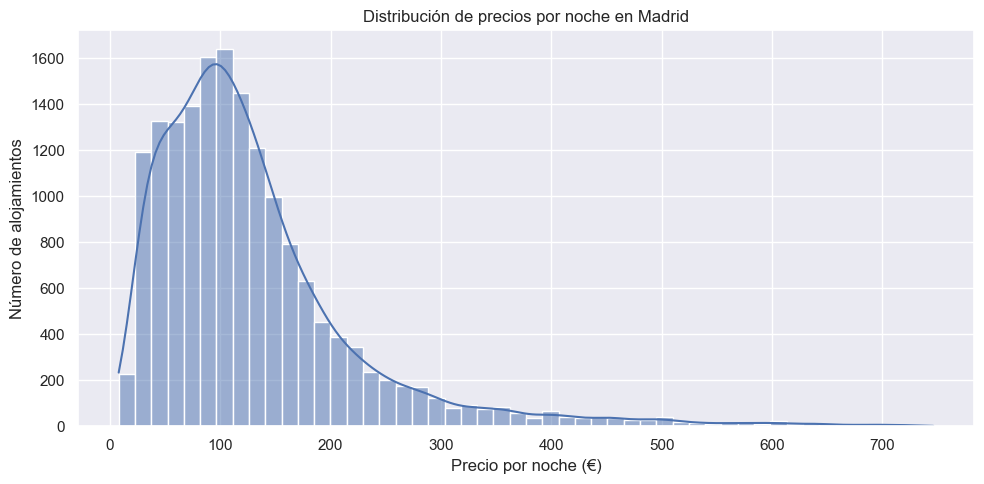

In [14]:
fig, ax = plt.subplots()
sns.histplot(df["price"], bins=50, kde=True, ax=ax)
ax.set_title("Distribución de precios por noche en Madrid")
ax.set_xlabel("Precio por noche (€)")
ax.set_ylabel("Número de alojamientos")

fig.tight_layout()
fig.savefig("src/img/distribucion_precios.png", dpi=300)
plt.show()

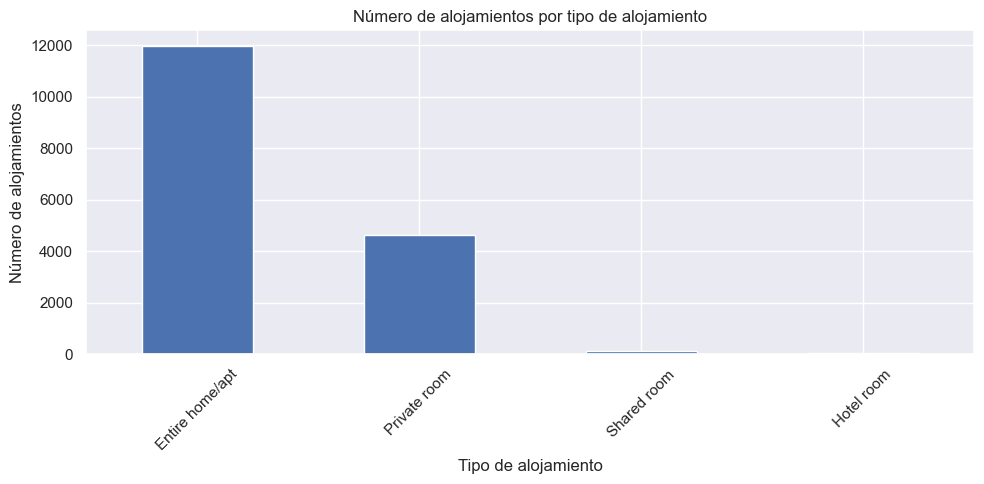

In [15]:
if "room_type" in df.columns:
    fig, ax = plt.subplots()
    df["room_type"].value_counts().plot(kind="bar", ax=ax)
    ax.set_title("Número de alojamientos por tipo de alojamiento")
    ax.set_xlabel("Tipo de alojamiento")
    ax.set_ylabel("Número de alojamientos")
    plt.xticks(rotation=45)

    fig.tight_layout()
    fig.savefig("src/img/tipos_alojamiento.png", dpi=300)
    plt.show()

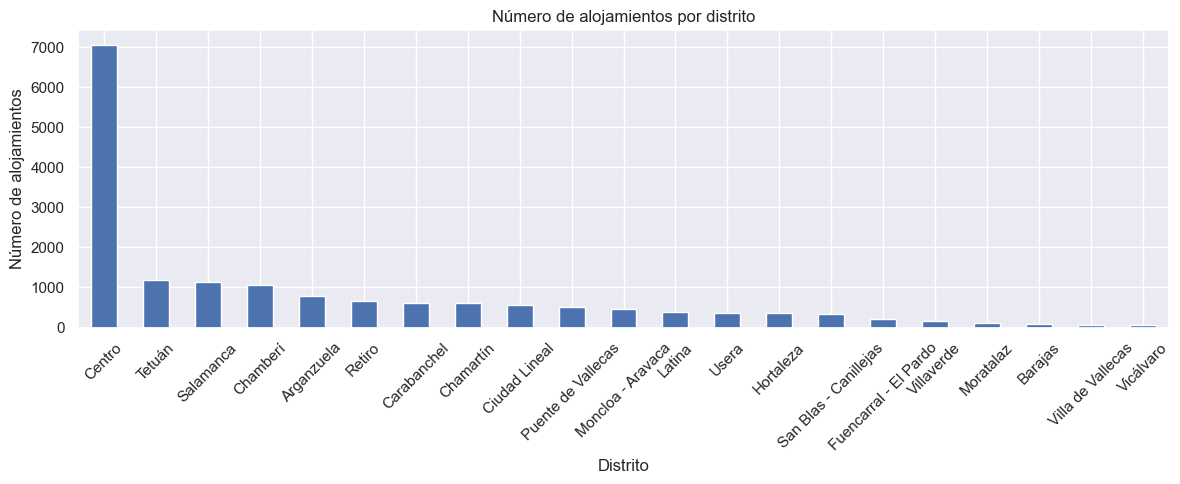

In [16]:
if "neighbourhood_group" in df.columns:
    fig, ax = plt.subplots(figsize=(12, 5))
    df["neighbourhood_group"].value_counts().plot(kind="bar", ax=ax)
    ax.set_title("Número de alojamientos por distrito")
    ax.set_xlabel("Distrito")
    ax.set_ylabel("Número de alojamientos")
    plt.xticks(rotation=45)

    fig.tight_layout()
    fig.savefig("src/img/alojamientos_por_distrito.png", dpi=300)
    plt.show()

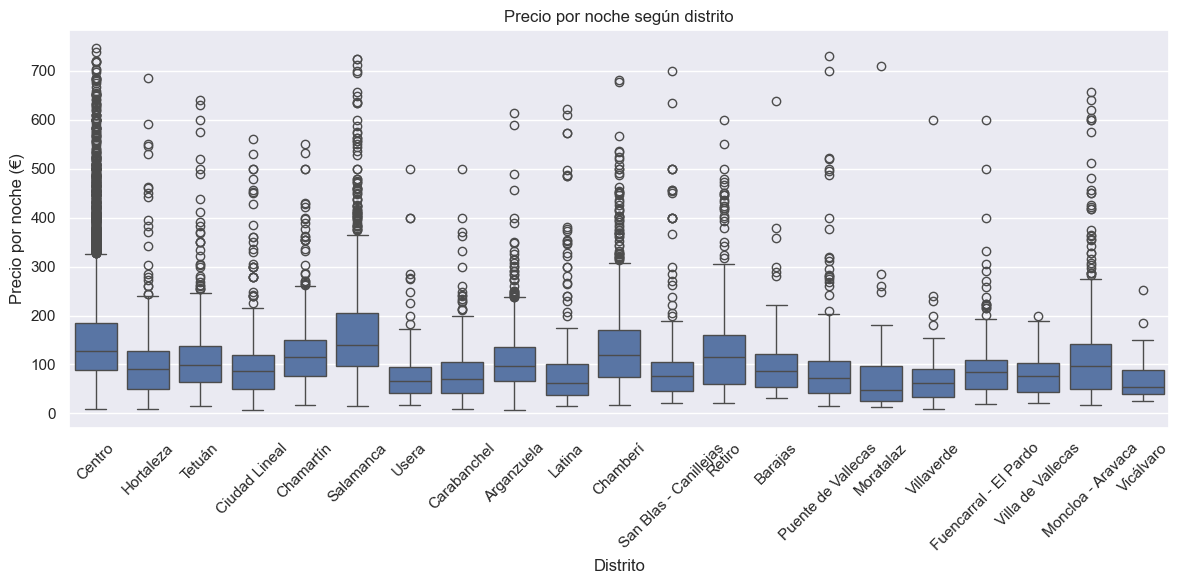

In [17]:
if "neighbourhood_group" in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(data=df, x="neighbourhood_group", y="price", ax=ax)
    ax.set_title("Precio por noche según distrito")
    ax.set_xlabel("Distrito")
    ax.set_ylabel("Precio por noche (€)")
    plt.xticks(rotation=45)

    fig.tight_layout()
    fig.savefig("src/img/boxplot_distritos.png", dpi=300)
    plt.show()

    # Tabla resumen por distrito
    resumen_distritos = df.groupby("neighbourhood_group")["price"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)
    resumen_distritos

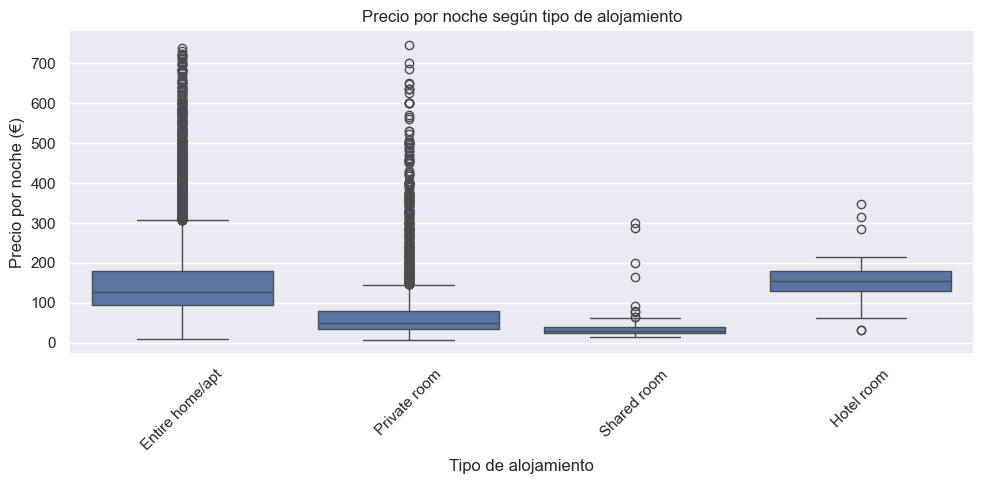

In [18]:
if "room_type" in df.columns:
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x="room_type", y="price", ax=ax)
    ax.set_title("Precio por noche según tipo de alojamiento")
    ax.set_xlabel("Tipo de alojamiento")
    ax.set_ylabel("Precio por noche (€)")
    plt.xticks(rotation=45)

    fig.tight_layout()
    fig.savefig("src/img/boxplot_tipo.png", dpi=300)
    plt.show()

    # Resumen por tipo de alojamiento
    resumen_tipo = df.groupby("room_type")["price"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)
    resumen_tipo

In [19]:
if "accommodates" in df.columns:
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x="accommodates", y="price", alpha=0.4, ax=ax)
    ax.set_title("Relación entre capacidad del alojamiento y precio")
    ax.set_xlabel("Número de huéspedes (accommodates)")
    ax.set_ylabel("Precio por noche (€)")

    fig.tight_layout()
    fig.savefig("src/img/scatter_accommodates_price.png", dpi=300)
    plt.show()

    # Resumen por capacidad
    resumen_capacidad = df.groupby("accommodates")["price"].agg(["count", "mean", "median"]).sort_values("mean", ascending=True)
    resumen_capacidad.head(20)

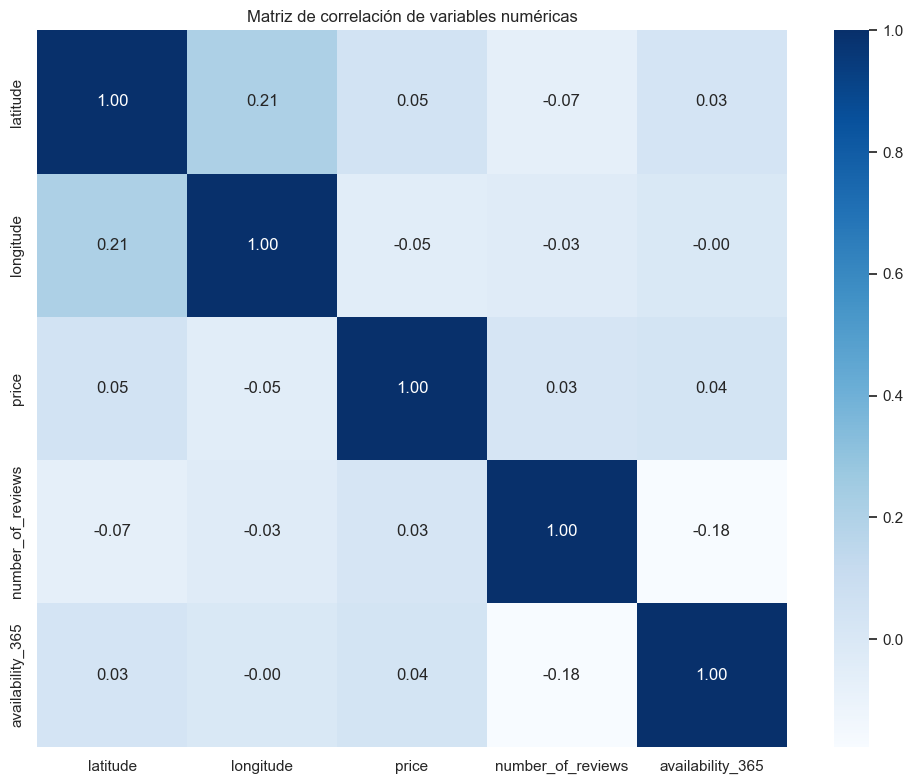

In [20]:
# Seleccionamos solo columnas numéricas
df_num = df.select_dtypes(include=["int64", "float64"])

corr = df_num.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", ax=ax)
ax.set_title("Matriz de correlación de variables numéricas")

fig.tight_layout()
fig.savefig("src/img/correlacion.png", dpi=300)
plt.show()

## Verificación de hipótesis

**Hipótesis 1**: *Los alojamientos situados en distritos céntricos presentan precios más elevados que los alojamientos en distritos periféricos.*

- A partir del boxplot por `neighbourhood_group` y de la tabla resumen, se observa que los distritos del centro de Madrid (por ejemplo, Centro, Salamanca, Chamberí, etc.) presentan un precio medio significativamente mayor que otros distritos más periféricos.
- **Conclusión**: la hipótesis 1 se **confirma**.

---

**Hipótesis 2**: *El tipo de alojamiento influye de forma significativa en el precio por noche.*

- El boxplot por `room_type` muestra diferencias claras entre los tipos de alojamiento.
- Los alojamientos completos (`Entire home/apt`) tienen un precio medio superior a las habitaciones privadas y compartidas.
- **Conclusión**: la hipótesis 2 se **confirma**.

---

**Hipótesis 3**: *Existe una relación positiva entre la capacidad del alojamiento (accommodates) y el precio.*

- El diagrama de dispersión `accommodates` vs `price` muestra que, en general, a mayor capacidad, mayor precio.
- La tabla agrupada por `accommodates` también refleja un incremento del precio medio con el número de huéspedes.
- **Conclusión**: la hipótesis 3 se **confirma**.


# Conclusiones finales

- La **ubicación** del alojamiento (por distrito) es un factor clave para explicar el precio por noche. Los distritos más céntricos presentan precios más elevados que las zonas periféricas.
- El **tipo de alojamiento** también influye de forma importante: los alojamientos completos son, de media, bastante más caros que las habitaciones privadas o compartidas.
- La **capacidad** (número de huéspedes que admite el alojamiento) se relaciona positivamente con el precio: a mayor capacidad, mayor precio por noche.
- El análisis confirma las hipótesis planteadas inicialmente y proporciona una visión clara del comportamiento de los precios de los alojamientos turísticos en Madrid publicados en Airbnb.